# 경사하강법을 구현해보자
- gradient_descent
- w1: 3.942 / w0: 6.812
- Gradient Descent Total Cost :15.8807

In [13]:
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N #residual sum of squares
    return cost

def get_weight_update(w1,w0,x,y,learning_rate=0.01):
    N=len(y)
    # 회귀계수 shape과 동일하게 0으로 초기화
    w1_shape = np.zeros_like(w1)
    w0_shape = np.zeros_like(w0)
    # 예측배열 계산하고 예측과 실제 값의 차이계산
    y_pred = np.dot(x,w1.T) + w0
    diff = y-y_pred
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두  1값을 가진 행렬 생성
    w0_factors =np.ones((N,1))
    # 업데이트
    w1_update = -(2/N)*learning_rate*(np.dot(x.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update,w0_update

def gradient_descent_steps(x,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1,w0,x,y,learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update
    return w1,w0

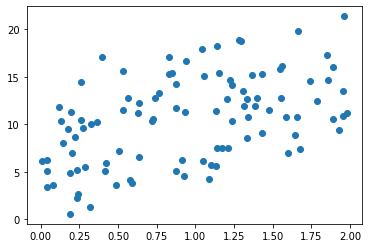

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4x + 6 
x = 2 * np.random.rand(100,1) # 0-1사이의 난수를 100x1 형태로 생성
y = 6 + 4*(x+np.random.randn(100,1)) # 평균 0 , 표준편차 1의 가우시안 표준정규분포난수를 100x1 형태로 생성

plt.scatter(x,y)

w1: 3.942 / w0: 6.812
Gradient Descent Total Cost :15.8807


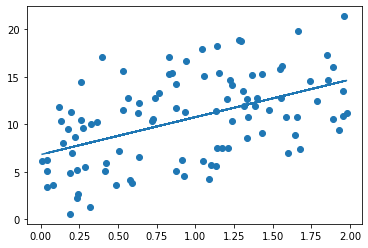

In [18]:
w1,w0 = gradient_descent_steps(x,y,iters=1000)
print('w1: {0:.3f} / w0: {1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*x +w0[0,0]
print('Gradient Descent Total Cost :{0:.4f}'.format(get_cost(y,y_pred)))

plt.scatter(x,y)
plt.plot(x,y_pred)

# 확률적 경사하강법을 구현해보자. 
- Stochastic_gradient_descent
- 전체 데이터가 아닌 랜덤하게 배치 사이즈 만큼데이터를 추출해 이용한다. 그래서 경사하강법 보다 더 빠르게 결과를 도출 해 낼수 있다.
- w1: 3.961 / w0: 6.801
- Gradient Descent Total Cost :15.8816

In [24]:
def stochastic_gradient_descent(x,y,batch_size=10,iters=1000) :
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        # x.y데이터 에서 랜덤하게 배치사이즈만큼 데이터를 추출한다.
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        #추출된데이터를 기반으로 업데이트를 한다.
        w1_update, w0_update = get_weight_update(w1,w0,sample_x,sample_y,learning_rate=0.01)
        w1-=w1_update
        w0-=w0_update
    return w1,w0

w1: 3.961 / w0: 6.801
Gradient Descent Total Cost :15.8816


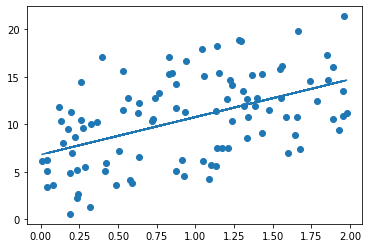

In [25]:
w1,w0 = stochastic_gradient_descent(x,y,batch_size=10,iters=1000)
print('w1: {0:.3f} / w0: {1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*x +w0[0,0]
print('Gradient Descent Total Cost :{0:.4f}'.format(get_cost(y,y_pred)))

plt.scatter(x,y)
plt.plot(x,y_pred)

# 결론
- 현재 데이터에서는 경사하강법이나 확률적 경사하강법이나 성능차이가 크지않다.
- 데이터가 큰 경우, 확률적 경사하강법을 주로 이용한다. 